In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = pd.read_excel(r'C:\Users\jainmiahsk\Desktop\data.xlsx', index_col = 0)
data.head()

,x,y,cluster
1,-8.482852,-5.603349,2
2,-7.751632,-8.405334,2
3,-10.967098,-9.032782,2
4,-11.999447,-7.606734,2
5,-1.736810,10.478015,1


In [13]:
data['cluster'].value_counts()

1    67
0    67
2    66
Name: cluster, dtype: int64

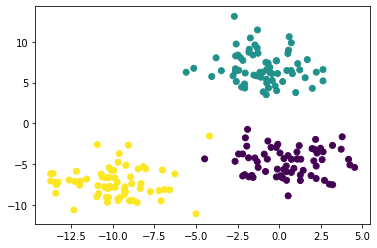

In [14]:
plt.scatter(data['x'], data['y'], c = data['cluster'], cmap = 'viridis')

## Do clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
X = data[['x', 'y']]
y = data['cluster']

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.01200363, -0.60606415],
       [-0.86550679, -1.04265203],
       [-1.5097118 , -1.14041707],
       [-1.71653856, -0.91821912],
       [ 0.33953731,  1.89963378],
       [ 0.38183922,  1.1890842 ],
       [ 0.24668446, -0.74232845],
       [-1.44313178, -0.76182643],
       [ 0.32130834, -0.75849023],
       [ 0.83110494,  1.27684537],
       [ 0.31775088, -0.39338956],
       [ 1.20365218, -0.4290876 ],
       [-0.07305683,  1.51966781],
       [ 0.63827173,  0.98134203],
       [ 1.52205697, -0.42280098],
       [ 0.17043691,  1.06578799],
       [ 1.5381542 , -0.52935538],
       [ 0.27161133, -0.71651135],
       [-1.35289151, -0.93641563],
       [ 0.79308339, -0.35212834],
       [ 0.14633873,  2.31330628],
       [ 1.14228061, -0.30354302],
       [ 1.12503491, -0.04177872],
       [-1.17977302, -1.09578279],
       [-2.01238779, -0.86540408],
       [ 0.19152374,  1.57228952],
       [ 0.83261025,  1.80799546],
       [ 0.66508288, -0.6110459 ],
       [-1.12827817,

In [18]:
data[['x', 'y']] = X

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [20]:
center = kmeans.cluster_centers_
center

array([[ 0.63701655,  0.42500526],
       [-1.32303438, -0.88270323]])

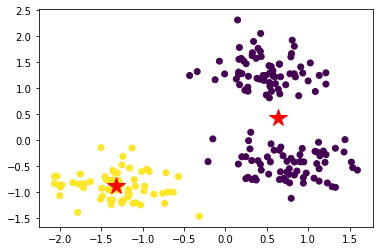

In [21]:
plt.scatter(data['x'], data['y'], c = kmeans.labels_, cmap = 'viridis')
for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)

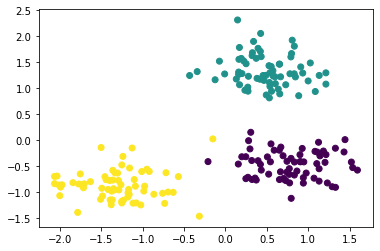

In [22]:
plt.scatter(data['x'], data['y'], c = data['cluster'], cmap = 'viridis')

In [23]:
SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)

399.99999999999994
156.41033617954895
44.05704845329266
36.85585101890122
30.989799117786724
25.240846029379895
22.708587641621317
19.85021235814986
17.336733909554162


Text(0, 0.5, 'SEE')

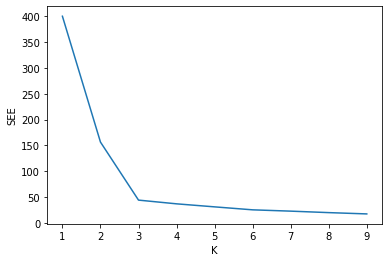

In [24]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SEE')